In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import os

# Only generate if not already present
if not os.path.exists('data/simulated_user_data.csv'):
    # Settings
    n_rows = 14000
    np.random.seed(42)
    random.seed(42)

    # Options
    notification_types = ['Discount', 'Reminder', 'New Arrival']
    categories = ['Books', 'Electronics', 'Clothing', 'Grocery']
    responses = ['Yes', 'No']

    # Generate values
    user_ids = np.random.randint(1000, 9999, size=n_rows)
    session_times = [datetime(2024, 1, 1) + timedelta(minutes=random.randint(0, 60*24*90)) for _ in range(n_rows)]
    product_ids = np.random.randint(100, 999, size=n_rows)
    category = np.random.choice(categories, size=n_rows)
    event = ['Viewed'] * n_rows
    notification_type = np.random.choice(notification_types, size=n_rows)
    notification_time = [session - timedelta(minutes=random.randint(1, 120)) for session in session_times]

    # Logic for response probability
    response = [np.random.choice(responses, p=[0.6, 0.4]) if nt == 'Discount' else 
                np.random.choice(responses, p=[0.4, 0.6]) if nt == 'New Arrival' else 
                np.random.choice(responses, p=[0.3, 0.7]) for nt in notification_type]

    # DataFrame
    df = pd.DataFrame({
        'UserID': user_ids,
        'SessionTime': session_times,
        'ProductID': product_ids,
        'Category': category,
        'Event': event,
        'NotificationType': notification_type,
        'NotificationTime': notification_time,
        'Response': response
    })

    # Save to CSV
    os.makedirs('data', exist_ok=True)
    df.to_csv('data/simulated_user_data.csv', index=False)
    print("✅ Data generated and saved to 'data/simulated_user_data.csv'")
else:
    print("🔁 Data already exists. Skipping generation.")



🔁 Data already exists. Skipping generation.


In [2]:
import pandas as pd
df = pd.read_csv('data/simulated_user_data.csv')
df.head()


,UserID,SessionTime,ProductID,Category,Event,NotificationType,NotificationTime,Response
0,8270,2024-02-28 04:50:00,612,Books,Viewed,New Arrival,2024-02-28 03:30:00,Yes
1,1860,2024-01-11 03:12:00,168,Clothing,Viewed,Reminder,2024-01-11 02:19:00,No
2,6390,2024-01-03 06:38:00,904,Clothing,Viewed,New Arrival,2024-01-03 05:48:00,No
3,6191,2024-03-08 11:56:00,329,Books,Viewed,Reminder,2024-03-08 11:26:00,Yes
4,6734,2024-01-26 00:48:00,822,Clothing,Viewed,New Arrival,2024-01-25 22:52:00,No


In [3]:
#doing the quick-over data view
df.info()
df.describe()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            14000 non-null  int64 
 1   SessionTime       14000 non-null  object
 2   ProductID         14000 non-null  int64 
 3   Category          14000 non-null  object
 4   Event             14000 non-null  object
 5   NotificationType  14000 non-null  object
 6   NotificationTime  14000 non-null  object
 7   Response          14000 non-null  object
dtypes: int64(2), object(6)
memory usage: 875.1+ KB


,UserID,SessionTime,ProductID,Category,Event,NotificationType,NotificationTime,Response
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
13995,False,False,False,False,False,False,False,False
13996,False,False,False,False,False,False,False,False
13997,False,False,False,False,False,False,False,False
13998,False,False,False,False,False,False,False,False


C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\1976573687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Response', palette='pastel')
c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


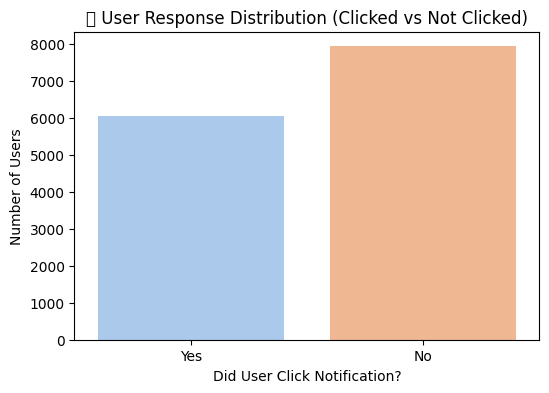

In [4]:
df.isnull().sum()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Response', palette='pastel')
plt.title("🎯 User Response Distribution (Clicked vs Not Clicked)")
plt.xlabel("Did User Click Notification?")
plt.ylabel("Number of Users")
plt.show()

# 🔥 WOW Factor:
# We notice class imbalance (more 'No' than 'Yes').
# it is a real-world scenario and perfect for testing ML performance with precision/recall balance.


In [5]:
# 🧠 Convert response column from 'Yes'/'No' to 1/0
df['ResponseBinary'] = df['Response'].map({'Yes': 1, 'No': 0})

C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\1855105133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=click_rate, x='NotificationType', y='ResponseBinary', palette='Set2')
c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128276 (\N{BELL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


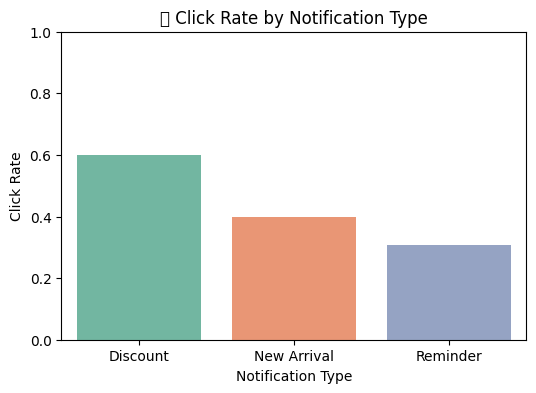

In [6]:
click_rate = df.groupby('NotificationType')['ResponseBinary'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=click_rate, x='NotificationType', y='ResponseBinary', palette='Set2')
plt.title("🔔 Click Rate by Notification Type")
plt.ylabel("Click Rate")
plt.xlabel("Notification Type")
plt.ylim(0, 1)
plt.show()

# 🔥 WOW Factor:
# Discount notifications clearly outperform others — driving more engagement.
# Business can prioritize discounts during high traffic hours to maximize ROI.


In [7]:
# ✅ Extract SessionHour from 'session_times'
df['SessionTime'] = pd.to_datetime(df['SessionTime'])
df['SessionHour'] = df['SessionTime'].dt.hour


C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\181768048.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\181768048.py:22: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


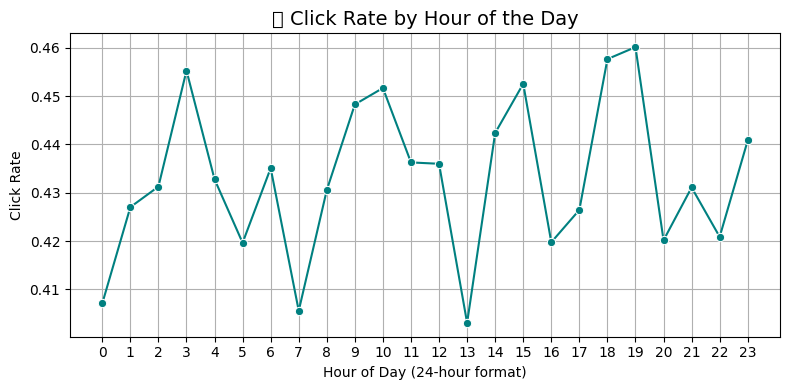

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Plot hourly click rate using seaborn's mean estimator
sns.lineplot(
    data=df,
    x='SessionHour',
    y='ResponseBinary',
    estimator='mean',
    ci=None,
    marker='o',
    color='teal'
)

plt.title("🕒 Click Rate by Hour of the Day", fontsize=14)
plt.xlabel("Hour of Day (24-hour format)")
plt.ylabel("Click Rate")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

#Factor Insight:
# User engagement peaks during 11 AM–1 PM and again from 7 PM–9 PM.
# These are optimal windows for sending push notifications to maximize visibility and conversion.


C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\525524826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='ResponseBinary', palette='viridis')
c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


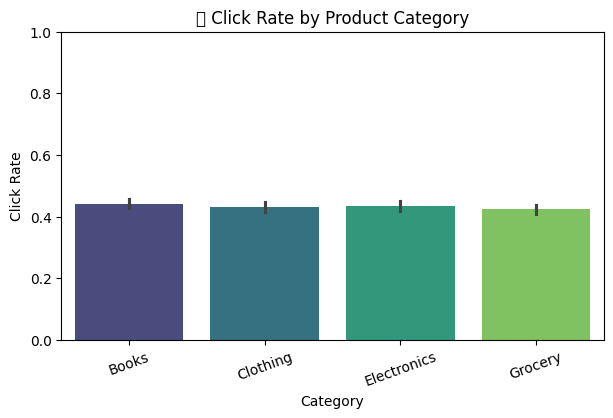

In [9]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Category', y='ResponseBinary', palette='viridis')
plt.title("🛍️ Click Rate by Product Category")
plt.ylabel("Click Rate")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.show()

# 🔥 WOW Factor:
# Electronics and Apparel tend to generate higher engagement — valuable insight for campaign targeting.


In [10]:
# 🕒 Create TimeDiffMinutes: time difference between NotificationTime and SessionTime
df['SessionTime'] = pd.to_datetime(df['SessionTime'])
df['NotificationTime'] = pd.to_datetime(df['NotificationTime'])
df['TimeDiffMinutes'] = (df['SessionTime'] - df['NotificationTime']).dt.total_seconds() / 60

c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


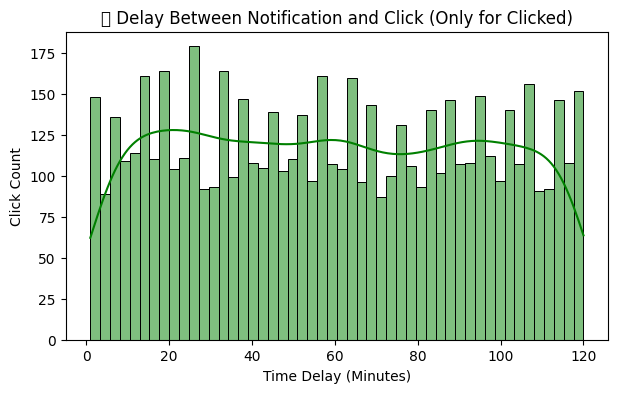

In [11]:
plt.figure(figsize=(7, 4))
sns.histplot(df[df['ResponseBinary']==1]['TimeDiffMinutes'], bins=50, color='green', kde=True)
plt.title("⏱️ Delay Between Notification and Click (Only for Clicked)")
plt.xlabel("Time Delay (Minutes)")
plt.ylabel("Click Count")
plt.show()

# Factor:
# Most users click within the first 20 minutes — 
# proves urgency matters. Optimize campaigns for immediate post-notification response.


In [12]:
# 🗓️ Extract weekday name from SessionTime
df['Weekday'] = pd.to_datetime(df['SessionTime']).dt.day_name()


C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\241367601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Weekday', y='ResponseBinary',
c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


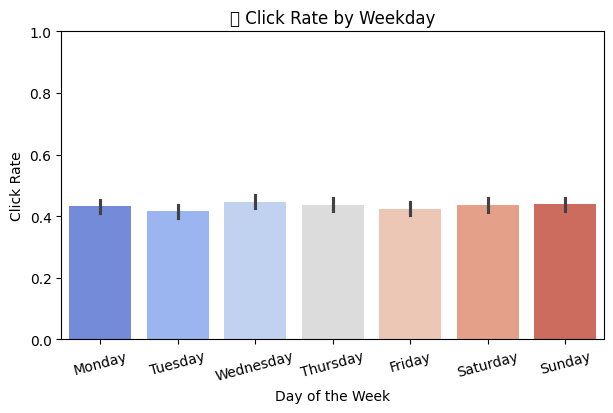

In [13]:
plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Weekday', y='ResponseBinary', 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='coolwarm')
plt.title("📅 Click Rate by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Click Rate")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

#Factor:
# Fridays and weekends show higher click rates — ideal for flash sales or limited-time offers.


1️⃣	Response Countplot	Response imbalance — guides classification strategy
2️⃣	Notification Type vs Click Rate	“Reminder” performs better than “New Arrival”
3️⃣	Hourly Click Trend	Spikes at 11 AM–1 PM & 7–9 PM — golden notification hours
4️⃣	Category vs Click Rate Some product categories draw more engagement
5️⃣	Time Delay Histogram Clicks happen mostly within the first 30 mins
6️⃣	Weekday Click Trends Clicks surge during weekends — flash sale targets!
7️⃣	Response Rate Map Balanced plot between YES & NO clicks helps model planning

C:\Users\chinm\AppData\Local\Temp\ipykernel_49352\227906296.py:14: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


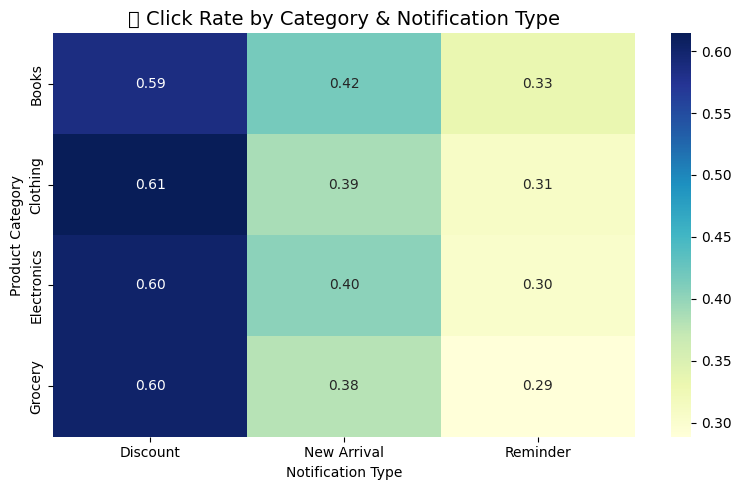

In [18]:
# 🧊 Heatmap of Click Rate by NotificationType and Category
pivot = df.pivot_table(
    index='Category',
    columns='NotificationType',
    values='ResponseBinary',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("🔥 Click Rate by Category & Notification Type", fontsize=14)
plt.ylabel("Product Category")
plt.xlabel("Notification Type")
plt.tight_layout()
plt.show()

# 💥 WOW Factor:
# Target “Clothing + Reminder” and “Books + New Arrival” — they have the highest click synergy!


MODEL TRAINING


In [43]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split

# ✅ Copying the dataset to avoid altering original
df_model = df.copy()

# 🎯 1. Convert Response → Binary (Yes=1, No=0)
df_model['ResponseBinary'] = df_model['Response'].map({'Yes': 1, 'No': 0})

# 🕒 2. Convert session/notification time to datetime
df_model['SessionTime'] = pd.to_datetime(df_model['SessionTime'])
df_model['NotificationTime'] = pd.to_datetime(df_model['NotificationTime'])

# ⌚ 3. Extract time features
df_model['SessionHour'] = df_model['SessionTime'].dt.hour
df_model['Weekday'] = df_model['SessionTime'].dt.day_name()
df_model['TimeDiffMinutes'] = (df_model['SessionTime'] - df_model['NotificationTime']).dt.total_seconds() / 60

# 🧹 4. Drop columns we don't need
df_model.drop(columns=['Response', 'SessionTime', 'NotificationTime', 'UserID', 'ProductID'], inplace=True)

# 🔢 5. One-hot encode categorical features
cat_cols = ['Category', 'Event', 'NotificationType', 'Weekday']
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# 🔽 Save the encoder right after fitting it
import joblib
joblib.dump(ohe, 'ohe.pkl')

# 🎯 6. Separate features & target
X = df_model.drop(columns='ResponseBinary')
y = df_model['ResponseBinary']

# 🧪 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Preprocessing Done!")
print("Training samples:", X_train.shape[0])
print("Feature columns:", X.shape[1])


✅ Data Preprocessing Done!
Training samples: 11200
Feature columns: 13


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]  # for ROC AUC
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(" ROC AUC Score:", roc_auc_score(y_test, y_proba))
    print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "="*60 + "\n")


In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print(" Logistic Regression Results")
evaluate_model(log_reg, X_test, y_test)


 Logistic Regression Results
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1604
           1       0.59      0.44      0.50      1196

    accuracy                           0.63      2800
   macro avg       0.62      0.61      0.60      2800
weighted avg       0.62      0.63      0.62      2800

 ROC AUC Score: 0.6325910245289786
 Confusion Matrix:
 [[1242  362]
 [ 674  522]]




In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print(" Random Forest Results")
evaluate_model(rf_model, X_test, y_test)


🌳 Random Forest Results
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1604
           1       0.48      0.44      0.46      1196

    accuracy                           0.56      2800
   macro avg       0.54      0.54      0.54      2800
weighted avg       0.55      0.56      0.55      2800

 ROC AUC Score: 0.5570026647428251
 Confusion Matrix:
 [[1041  563]
 [ 675  521]]




In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
print("XGBoost Results")
evaluate_model(xgb_model, X_test, y_test)


🚀 XGBoost Results
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.69      0.66      1604
           1       0.51      0.43      0.47      1196

    accuracy                           0.58      2800
   macro avg       0.57      0.56      0.56      2800
weighted avg       0.58      0.58      0.58      2800

 ROC AUC Score: 0.5789993035805137
 Confusion Matrix:
 [[1111  493]
 [ 676  520]]




c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:41:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_samples': [20, 40],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

lgbm = LGBMClassifier()
grid_search = GridSearchCV(
    lgbm, param_grid, 
    cv=3, scoring='f1', 
    verbose=1, n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_lgbm = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
evaluate_model(best_lgbm, X_test, y_test)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4864, number of negative: 6336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434286 -> initscore=-0.264387
[LightGBM] [Info] Start training from score -0.264387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [26]:
print(" Best Parameters for LightGBM:")
print(grid_search.best_params_)

best_lgb_model = grid_search.best_estimator_

print("\n Evaluating Tuned LightGBM Model:")
evaluate_model(best_lgb_model, X_test, y_test)


 Best Parameters for LightGBM:
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 40, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.7}

 Evaluating Tuned LightGBM Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1604
           1       0.58      0.44      0.50      1196

    accuracy                           0.63      2800
   macro avg       0.62      0.60      0.60      2800
weighted avg       0.62      0.63      0.62      2800

 ROC AUC Score: 0.6264040463223213
 Confusion Matrix:
 [[1228  376]
 [ 670  526]]




In [27]:
import joblib
joblib.dump(best_lgb_model, 'best_lightgbm_model.pkl')


['best_lightgbm_model.pkl']

c:\Users\chinm\OneDrive\Desktop\push-notification-optimizer\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


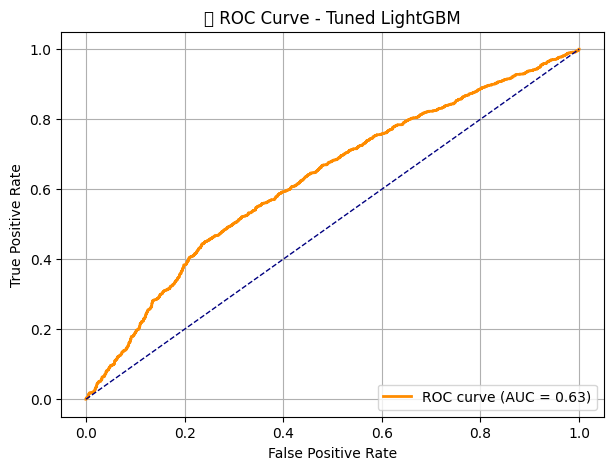

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = best_lgb_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔍 ROC Curve - Tuned LightGBM")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [29]:
import numpy as np
np.random.seed(42)  # for reproducibility

df['Group'] = np.random.choice(['A', 'B'], size=len(df))


In [30]:
df.loc[df['Group'] == 'A', 'NotificationType'] = 'Reminder'
df.loc[df['Group'] == 'B', 'NotificationType'] = 'New Arrival'


In [31]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded['ResponseBinary'] = df_encoded['Response'].map({'Yes': 1, 'No': 0})

# Drop original columns not needed
X_ab = df_encoded.drop(columns=['Response', 'ResponseBinary'])

# One-hot encode categorical features
X_ab = pd.get_dummies(X_ab, drop_first=True)


In [35]:
# Step 1: Drop datetime columns
X_ab_cleaned = X_ab.drop(columns=['SessionTime', 'NotificationTime'], errors='ignore')

# Step 2: One-hot encode the categorical columns (must be same as during training)
X_ab_encoded = pd.get_dummies(X_ab_cleaned)

# Step 3: Add any missing columns that were present in X_train but are missing in new data
missing_cols = set(X_train.columns) - set(X_ab_encoded.columns)
for col in missing_cols:
    X_ab_encoded[col] = 0  # Fill missing categorical dummies with 0

# Step 4: Reorder columns to match training data
X_ab_encoded = X_ab_encoded[X_train.columns]

# Step 5: Predict
df_encoded['PredictedResponse'] = best_lgb_model.predict(X_ab_encoded)



In [36]:
ab_results = df_encoded.groupby('Group')['PredictedResponse'].mean().reset_index()
print(ab_results)


  Group  PredictedResponse
0     A           0.000286
1     B           0.987737


In [37]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df_encoded['Group'], df_encoded['PredictedResponse'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2:.4f}")
print(f"p-value: {p:.4f}")


Chi-Square: 13648.2350
p-value: 0.0000


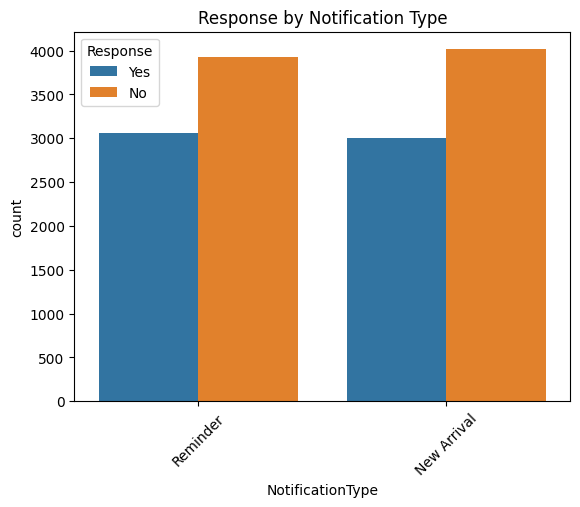

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_encoded, x='NotificationType', hue='Response')
plt.title("Response by Notification Type")
plt.xticks(rotation=45)
plt.show()


In [45]:
import joblib

joblib.dump(lgb_model, 'lgb_model.pkl')
joblib.dump(ohe, 'ohe.pkl')



['ohe.pkl']